In [94]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [95]:
# =============================================================================
# =============================================================================
# # 문제 01 유형(DataSet_01.csv 이용)
#
# 구분자 : comma(“,”), 4,572 Rows, 5 Columns, UTF-8 인코딩
# 
# 글로벌 전자제품 제조회사에서 효과적인 마케팅 방법을 찾기
# 위해서 채널별 마케팅 예산과 매출금액과의 관계를 분석하고자
# 한다.
# 컬 럼 / 정 의  /   Type
# TV   /     TV 마케팅 예산 (억원)  /   Double
# Radio / 라디오 마케팅 예산 (억원)  /   Double
# Social_Media / 소셜미디어 마케팅 예산 (억원)  / Double
# Influencer / 인플루언서 마케팅
# (인플루언서의 영향력 크기에 따라 Mega / Macro / Micro / 
# Nano) / String

# SALES / 매출액 / Double
# =============================================================================
# =============================================================================

In [96]:
# =============================================================================
# 1. 데이터 세트 내에 총 결측값의 개수는 몇 개인가? (답안 예시) 23
# =============================================================================

import pandas as pd
var_lst = ['TV', 'Radio', 'Social_Media']

dat1 = pd.read_csv('./data/Dataset_01.csv')
dat1.info()
dat1.columns
dat1.isna().sum().sum() # 답 : 26

# [참고] : 결측치가 포함된 행의 수
dat1.isna().any(axis=1).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social_Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


Index(['TV', 'Radio', 'Social_Media', 'Influencer', 'Sales'], dtype='object')

26

26

In [97]:
# =============================================================================
# 2. TV, Radio, Social Media 등 세 가지 다른 마케팅 채널의 예산과 매출액과의 상관분석을
# 통하여 각 채널이 매출에 어느 정도 연관이 있는지 알아보고자 한다. 
# - 매출액과 가장 강한 상관관계를 가지고 있는 채널의 상관계수를 소수점 5번째
# 자리에서 반올림하여 소수점 넷째 자리까지 기술하시오. (답안 예시) 0.1234
# =============================================================================

var_list=['TV', 'Radio', 'Social_Media', 'Sales']

q2=dat1.corr().drop('Sales')['Sales'].abs()


# 상관계수를 소수점 5번째
# 자리에서 반올림하여 소수점 넷째 자리까지 기술

q2.max() # 최대값
q2.idxmax() # 인덱스명
q2.argmax() # 위치번호
q2.nlargest(1) # 값과 인덱스명

round(q2.max(),4)

# 답: 0.9995

0.999497444941335

'TV'

0

TV    0.999497
Name: Sales, dtype: float64

0.9995

In [98]:
# =============================================================================
# 3. 매출액을 종속변수, TV, Radio, Social Media의 예산을 독립변수로 하여 회귀분석을
# 수행하였을 때, 세 개의 독립변수의 회귀계수를 큰 것에서부터 작은 것 순으로
# 기술하시오. 
# - 분석 시 결측치가 포함된 행은 제거한 후 진행하며, 회귀계수는 소수점 넷째 자리
# 이하는 버리고 소수점 셋째 자리까지 기술하시오. (답안 예시) 0.123
# =============================================================================
var_list=['TV', 'Radio', 'Social_Media']

q3=dat1.dropna()

from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from statsmodels.api import OLS, add_constant

lm = LinearRegression(fit_intercept = True).fit(q3[var_lst], q3['Sales'])     # fit_intercept=True : 상수항 제거 x

# q3['Sales'].shape                           # (4546, ) 1차원 구조
# q3[['Sales']].shape                         # (4546, 1) 2차원 구조
# q3['Sales'].values.reshape(-1, 1).shape     # (4546, 1)

# print(dir(lm))
lm.intercept_       # 상수항 / 절편
lm.coef_            # 회귀계수

# OLS
# 범주형 변수 자동으로 더미형변수로 바꿔줌
# 식 : 'y~x1+C(x2)+x3-1'
# 식 : 'y~x1+x2+x3-1'
# -1 : 상수항 미포함
# C() : 범주형 데이터.. 카테고리입니다..
# 변수1 = ols(식, 데이터).fit()
# 변수1 = ols(식, 데이터)
# 변수2 = 변수1.fit()
# 변수1.fit() -> error
# ols('Sales~TV+Radio+Social_Media')
form1 = 'Sales~' + '+'.join(var_lst)
q3_ols = ols(form1, q3).fit()
# print(dir(q3_ols))
q3_ols.summary()
q3_ols.params.drop('Intercept').sort_values(ascending=False).values
# 답: [ 3.56256963,  0.00496402, -0.00397039])

# [참고] 유의미한 변수 찾기
q3_ols.pvalues[q3_ols.pvalues < 0.05].index

# print(dir(q3_ols))
outlier_score=q3_ols.outlier_test()
q3[outlier_score['bonf(p)'] < 0.05]

q3_ols_2=OLS(q3['Sales'], add_constant(q3[var_list])).fit()
q3_ols_2.summary()

-0.13396305194206093

array([ 3.56256963, -0.00397039,  0.00496402])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.505e+06
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:32:21   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4542   BIC:                         2.277e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1340      0.103     -1.303      0.193      -0.336       0.068
TV               3.5626      0.003   1051.118      0.000       3.556       3.569
Radio           -0.0040      0.010     -0.406      0.685      -0.023       0.015
Social_Media     0.0050      0.025      0.199      0.842      -0.044       0.054
==============================================================================
Omnibus:                        0.056   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.034
Skew:                          -0.001   Prob(JB):                        0.983
Kurtosis:                       3.013   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

array([ 3.56256963,  0.00496402, -0.00397039])

Index(['TV'], dtype='object')

,TV,Radio,Social_Media,Influencer,Sales


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.505e+06
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:32:34   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4542   BIC:                         2.277e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1340      0.103     -1.303      0.193      -0.336       0.068
TV               3.5626      0.003   1051.118      0.000       3.556       3.569
Radio           -0.0040      0.010     -0.406      0.685      -0.023       0.015
Social_Media     0.0050      0.025      0.199      0.842      -0.044       0.054
==============================================================================
Omnibus:                        0.056   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.034
Skew:                          -0.001   Prob(JB):                        0.983
Kurtosis:                       3.013   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
# =============================================================================
# =============================================================================
# # 문제 02 유형(DataSet_02.csv 이용)
# 구분자 : comma(“,”), 200 Rows, 6 Columns, UTF-8 인코딩

# 환자의 상태와 그에 따라 처방된 약에 대한 정보를 분석하고자한다
# 
# 컬 럼 / 정 의  / Type
# Age  / 연령 / Integer
# Sex / 성별 / String
# BP / 혈압 레벨 / String
# Cholesterol / 콜레스테롤 레벨 /  String
# Na_to_k / 혈액 내 칼륨에 대비한 나트륨 비율 / Double
# Drug / Drug Type / String
# =============================================================================
# =============================================================================

data2 = pd.read_csv('./data/Dataset_02.csv')


#%%

# =============================================================================
# 1.해당 데이터에 대한 EDA를 수행하고, 여성으로 혈압이 High, Cholesterol이 Normal인
# 환자의 전체에 대비한 비율이 얼마인지 소수점 네 번째 자리에서 반올림하여 소수점 셋째
# 자리까지 기술하시오. (답안 예시) 0.123
# =============================================================================

q1 = data2[['Sex', 'BP', 'Cholesterol']].value_counts(normalize=True)
q1[('F', 'HIGH', 'NORMAL')]

0.105

In [100]:
# =============================================================================
# 2. Age, Sex, BP, Cholesterol 및 Na_to_k 값이 Drug 타입에 영향을 미치는지 확인하기
# 위하여 아래와 같이 데이터를 변환하고 분석을 수행하시오. 
# - Age_gr 컬럼을 만들고, Age가 20 미만은 ‘10’, 20부터 30 미만은 ‘20’, 30부터 40 미만은
# ‘30’, 40부터 50 미만은 ‘40’, 50부터 60 미만은 ‘50’, 60이상은 ‘60’으로 변환하시오. 
# - Na_K_gr 컬럼을 만들고 Na_to_k 값이 10이하는 ‘Lv1’, 20이하는 ‘Lv2’, 30이하는 ‘Lv3’, 30 
# 초과는 ‘Lv4’로 변환하시오.
# - Sex, BP, Cholesterol, Age_gr, Na_K_gr이 Drug 변수와 영향이 있는지 독립성 검정을
# 수행하시오.
# - 검정 수행 결과, Drug 타입과 연관성이 있는 변수는 몇 개인가? 연관성이 있는 변수
# 가운데 가장 큰 p-value를 찾아 소수점 여섯 번째 자리 이하는 버리고 소수점 다섯
# 번째 자리까지 기술하시오.
# (답안 예시) 3, 1.23456
# =============================================================================
import numpy as np

# 변수 생성
q2=data2.copy()

# np.where(조건) : 조건과 매칭되는 위치 리턴
# np.where(조건, 참 실행문, 거짓 실행문)
q2['Age_gr'] = np.where(q2.Age < 20, 10, 
                        np.where(q2.Age < 30, 20,
                        np.where(q2.Age < 40, 30,
                        np.where(q2.Age < 50, 40,
                        np.where(q2.Age < 60, 50, 60)))))
q2['Na_K_gr'] = np.where(q2.Na_to_K <= 10, 'Lv1',
                        np.where(q2.Na_to_K <=20, 'Lv2',
                        np.where(q2.Na_to_K <=30, 'Lv3', 'Lv4')))

# 빈도 생성
tab = pd.crosstab(index = q2['Sex'], columns = q2['Drug'])
tab

# chi-square 검정
from scipy.stats import chi2_contingency

chi_test = chi2_contingency(tab)
pvalue = chi_test[1]

# 반복문
q2.columns
var_list = ['Sex', 'BP', 'Cholesterol', 'Age_gr', 'Na_K_gr']

q2_out = []
for var in var_list:
    tab=pd.crosstab(index=q2[var], columns = q2['Drug'])
    chi_test = chi2_contingency(tab)
    pvalue = chi_test[1]
    q2_out.append([var, pvalue])

q2_out

# Drug 타입과 연관성이 있는 변수는 몇 개?

q2_out = pd.DataFrame(q2_out, columns = ['var', 'pvalue'])

q2_out_2 = q2_out[q2_out.pvalue < 0.05]
q2_out_2

# 연관성이 있는 변수 몇 개?
# 가운데 가장 큰 p-value를 찾아 소수점 여섯 번째 자리 이하 버림
import math
print(len(q2_out_2), '%.5f' % q2_out_2.pvalue.max())

Drug,DrugY,drugA,drugB,drugC,drugX
Sex,,,,,
F,47,9,6,7,27
M,44,14,10,9,27


Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug', 'Age_gr',
       'Na_K_gr'],
      dtype='object')

[['Sex', 0.7138369773987128],
 ['BP', 5.0417334144665895e-27],
 ['Cholesterol', 0.0005962588389856497],
 ['Age_gr', 0.0007010113024729462],
 ['Na_K_gr', 1.1254641594413981e-14]]

,var,pvalue
1,BP,5.041733e-27
2,Cholesterol,5.962588e-04
3,Age_gr,7.010113e-04
4,Na_K_gr,1.125464e-14


4 0.00070


[Text(0.6, 0.8333333333333334, 'Na_to_K <= 14.829\ngini = 0.694\nsamples = 200\nvalue = [91, 23, 16, 16, 54]\nclass = DrugY'),
 Text(0.4, 0.5, 'BP_cd <= 1.5\ngini = 0.667\nsamples = 109\nvalue = [0, 23, 16, 16, 54]\nclass = drugB'),
 Text(0.2, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.6, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 91\nvalue = [91, 0, 0, 0, 0]\nclass = DrugY')]

|--- Na_to_K <= 14.829
|   |--- BP_cd <= 1.500
|   |   |--- BP_cd <= 0.500
|   |   |   |--- Ch_cd <= 0.500
|   |   |   |   |--- class: drugX
|   |   |   |--- Ch_cd >  0.500
|   |   |   |   |--- class: drugC
|   |   |--- BP_cd >  0.500
|   |   |   |--- class: drugX
|   |--- BP_cd >  1.500
|   |   |--- Age <= 50.500
|   |   |   |--- class: drugA
|   |   |--- Age >  50.500
|   |   |   |--- class: drugB
|--- Na_to_K >  14.829
|   |--- class: DrugY



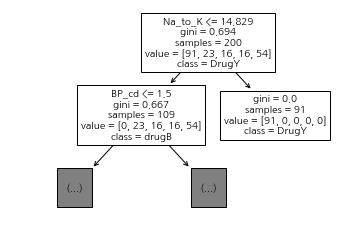

In [101]:
# =============================================================================
# 3.Sex, BP, Cholesterol 등 세 개의 변수를 다음과 같이 변환하고 의사결정나무를 이용한
# 분석을 수행하시오.
# - Sex는 M을 0, F를 1로 변환하여 Sex_cd 변수 생성
# - BP는 LOW는 0, NORMAL은 1 그리고 HIGH는 2로 변환하여 BP_cd 변수 생성
# - Cholesterol은 NORMAL은 0, HIGH는 1로 변환하여 Ch_cd 생성
# - Age, Na_to_k, Sex_cd, BP_cd, Ch_cd를 Feature로, Drug을 Label로 하여 의사결정나무를
# 수행하고 Root Node의 split feature와 split value를 기술하시오. 
# 이 때 split value는 소수점 셋째 자리까지 반올림하여 기술하시오. (답안 예시) Age, 
# 12.345
# =============================================================================

q3 = data2.copy()

# 변수 생성
q3['Sex_cd'] = np.where(q3.Sex == 'M', 0, 1)
q3['BP_cd'] = np.where(q3.BP == 'LOW', 0, 
                        np.where(q3.BP == 'NORMAL', 1, 2))
q3['Ch_cd'] = np.where(q3.Cholesterol == 'NORMAL' , 0, 1)

# 의사결정나무 적용 - 모델 생성
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

var_list = ['Age', 'Na_to_K', 'Sex_cd', 'BP_cd', 'Ch_cd']
dt = DecisionTreeClassifier().fit(q3[var_list], q3['Drug'])

# 모델 탐색, root node, rule 시각화, rule 텍스트 호출
plot_tree(dt, feature_names= var_list, class_names=q3['Drug'].unique(), max_depth = 1, fontsize=10)
print(export_text(dt, feature_names=var_list, decimals= 3))
# 답 : Na_to_K , 14.829

In [102]:
# =============================================================================
# =============================================================================
# # 문제 03 유형(DataSet_03.csv 이용)
# 
# 구분자 : comma(“,”), 5,001 Rows, 8 Columns, UTF-8 인코딩
# 안경 체인을 운영하고 있는 한 회사에서 고객 사진을 바탕으로 안경의 사이즈를
# 맞춤 제작하는 비즈니스를 기획하고 있다. 우선 데이터만으로 고객의 성별을
# 파악하는 것이 가능할 지를 연구하고자 한다.
#
# 컬 럼 / 정 의 / Type
# long_hair / 머리카락 길이 (0 – 길지 않은 경우 / 1 – 긴
# 경우) / Integer
# forehead_width_cm / 이마의 폭 (cm) / Double
# forehead_height_cm / 이마의 높이 (cm) / Double
# nose_wide / 코의 넓이 (0 – 넓지 않은 경우 / 1 – 넓은 경우) / Integer
# nose_long / 코의 길이 (0 – 길지 않은 경우 / 1 – 긴 경우) / Integer
# lips_thin / 입술이 얇은지 여부 0 – 얇지 않은 경우 / 1 –
# 얇은 경우) / Integer
# distance_nose_to_lip_long / 인중의 길이(0 – 인중이 짧은 경우 / 1 – 인중이
# 긴 경우) / Integer
# gender / 성별 (Female / Male) / String
# =============================================================================
# =============================================================================

# =============================================================================
# 1.이마의 폭(forehead_width_cm)과 높이(forehead_height_cm) 사이의
# 비율(forehead_ratio)에 대해서 평균으로부터 3 표준편차 밖의 경우를 이상치로
# 정의할 때, 이상치에 해당하는 데이터는 몇 개인가? (답안 예시) 10
# =============================================================================

data3 = pd.read_csv('./data/Dataset_03.csv')

q1 = data3.copy()

q1['forehead_ratio'] = q1['forehead_width_cm'] / q1['forehead_height_cm']

xbar = q1['forehead_ratio'].mean()
std = q1['forehead_ratio'].std()

UB = xbar + 3*std
LB = xbar - 3*std

len(q1[(q1['forehead_ratio'] > UB) | (q1['forehead_ratio'] < LB)])

# 답 : 3개

3

In [103]:
# =============================================================================
# 2.성별에 따라 forehead_ratio 평균에 차이가 있는지 적절한 통계 검정을 수행하시오.
# - 검정은 이분산을 가정하고 수행한다.
# - 검정통계량의 추정치는 절대값을 취한 후 소수점 셋째 자리까지 반올림하여
# 기술하시오.
# - 신뢰수준 99%에서 양측 검정을 수행하고 결과는 귀무가설 기각의 경우 Y로, 그렇지
# 않을 경우 N으로 답하시오. (답안 예시) 1.234, Y
# =============================================================================
q1.columns
g_m = q1[q1.gender == 'Male']['forehead_ratio']
g_f = q1[q1.gender == 'Female']['forehead_ratio']

from scipy.stats import ttest_ind       # 등분산 / 이분산 모르는 경우 bartlett도 import

q2_out = ttest_ind(g_m, g_f, equal_var=False, alternative="two-sided")
q2_out.pvalue
q2_out.pvalue < 0.01

# 답 : 0.0027186702390657176, Y

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender',
       'forehead_ratio'],
      dtype='object')

0.0027186702390657176

True

In [104]:
# =============================================================================
# 3.주어진 데이터를 사용하여 성별을 구분할 수 있는지 로지스틱 회귀분석을 적용하여
# 알아 보고자 한다. 
# - 데이터를 7대 3으로 나누어 각각 Train과 Test set로 사용한다. 이 때 seed는 123으로
# 한다.
# - 원 데이터에 있는 7개의 변수만 Feature로 사용하고 gender를 label로 사용한다.
# (forehead_ratio는 사용하지 않음)
# - 로지스틱 회귀분석 예측 함수와 Test dataset를 사용하여 예측을 수행하고 정확도를
# 평가한다. 이 때 임계값은 0.5를 사용한다. 
# - Male의 Precision 값을 소수점 둘째 자리까지 반올림하여 기술하시오. (답안 예시) 
# 0.12
# 
# 
# (참고) 
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn import metrics
# train_test_split 의 random_state = 123
# =============================================================================

# train/test 분리
from sklearn.model_selection import train_test_split

train, test=train_test_split(data3, test_size=0.3, random_state=123)

# 학습
from sklearn.linear_model import LogisticRegression

var_list=data3.columns.drop('gender')
logit=LogisticRegression(random_state=123).fit(train[var_list], train['gender'])

# print(dir(logit))

# 예측
q3_pred=logit.predict(test[var_list])
q3_pred_pr=logit.predict_proba(test[var_list])
np.where(q3_pred_pr[:,1] >= 0.7, 'Male', 'Female')

# 성능평가

from sklearn.metrics import precision_score, classification_report

precision_score(test['gender'], q3_pred, pos_label='Male')

# 답: 0.96

print(classification_report(test['gender'], q3_pred))

array(['Male', 'Male', 'Male', ..., 'Female', 'Male', 'Male'], dtype='<U6')

0.9596354166666666

              precision    recall  f1-score   support

      Female       0.97      0.96      0.96       743
        Male       0.96      0.97      0.97       758

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



In [105]:
# =============================================================================
# =============================================================================
# # 문제 04 유형(DataSet_04.csv 이용)
#
#구분자 : comma(“,”), 6,718 Rows, 4 Columns, UTF-8 인코딩

# 한국인의 식생활 변화가 건강에 미치는 영향을 분석하기에 앞서 육류
# 소비량에 대한 분석을 하려고 한다. 확보한 데이터는 세계 각국의 1인당
# 육류 소비량 데이터로 아래와 같은 내용을 담고 있다.

# 컬 럼 / 정 의 / Type
# LOCATION / 국가명 / String
# SUBJECT / 육류 종류 (BEEF / PIG / POULTRY / SHEEP) / String
# TIME / 연도 (1990 ~ 2026) / Integer
# Value / 1인당 육류 소비량 (KG) / Double
# =============================================================================
# =============================================================================

# =============================================================================
# 1.한국인의 1인당 육류 소비량이 해가 갈수록 증가하는 것으로 보여 상관분석을 통하여
# 확인하려고 한다. 
# - 데이터 파일로부터 한국 데이터만 추출한다. 한국은 KOR로 표기되어 있다.
# - 년도별 육류 소비량 합계를 구하여 TIME과 Value간의 상관분석을 수행하고
# 상관계수를 소수점 셋째 자리에서 반올림하여 소수점 둘째 자리까지만 기술하시오. 
# (답안 예시) 0.55
# =============================================================================
import pandas as pd
import numpy as np

data4=pd.read_csv('./data/Dataset_04.csv')

data4.columns

q1=data4[data4.LOCATION == 'KOR']
q1
q1_out = q1.groupby('TIME')['Value'].sum().reset_index()
round(q1_out.corr()['TIME']['Value'], 2)

# 답 : 0.96

Index(['LOCATION', 'SUBJECT', 'TIME', 'Value'], dtype='object')

,LOCATION,SUBJECT,TIME,Value
442,KOR,BEEF,1991,5.085481
443,KOR,BEEF,1992,5.685434
444,KOR,BEEF,1993,5.325765
445,KOR,BEEF,1994,5.698819
446,KOR,BEEF,1995,6.568429
...,...,...,...,...
583,KOR,SHEEP,2022,0.197951
584,KOR,SHEEP,2023,0.199098
585,KOR,SHEEP,2024,0.200266
586,KOR,SHEEP,2025,0.201451


0.96

In [106]:
# =============================================================================
# 2. 한국 인근 국가 가운데 식생의 유사성이 상대적으로 높은 일본(JPN)과 비교하여, 연도별
# 소비량에 평균 차이가 있는지 분석하고자 한다.
# - 두 국가의 육류별 소비량을 연도기준으로 비교하는 대응표본 t 검정을 수행하시오.
# - 두 국가 간의 연도별 소비량 차이가 없는 것으로 판단할 수 있는 육류 종류를 모두
# 적으시오. (알파벳 순서) (답안 예시) BEEF, PIG, POULTRY, SHEEP
# =============================================================================

# 한국, 일본 데이터만 필터링
q2=data4[data4.LOCATION.isin(['KOR', 'JPN'])]
q2

# 육류 목록 추출
sub_list = q2.SUBJECT.unique()
sub_list

from scipy.stats import ttest_rel

# 반복문 이용 육류 종류별 대응 t 검정
q2_out = []
for sub in sub_list:
    tmp = q2[q2.SUBJECT == sub]
    tmp_2 = pd.pivot_table(tmp, index='TIME', columns='LOCATION', values='Value', aggfunc='mean').dropna()      # 결측치있으면 대응 t-test 불가
    ttest_out = ttest_rel(tmp_2['KOR'], tmp_2['JPN'])
    q2_out.append([sub, ttest_out.pvalue >= 0.05])
q2_out

# 답 : POULTRY

,LOCATION,SUBJECT,TIME,Value
294,JPN,BEEF,1990,6.111035
295,JPN,BEEF,1991,6.517055
296,JPN,BEEF,1992,6.766244
297,JPN,BEEF,1993,7.406407
298,JPN,BEEF,1994,8.129090
...,...,...,...,...
583,KOR,SHEEP,2022,0.197951
584,KOR,SHEEP,2023,0.199098
585,KOR,SHEEP,2024,0.200266
586,KOR,SHEEP,2025,0.201451


array(['BEEF', 'PIG', 'POULTRY', 'SHEEP'], dtype=object)

[['BEEF', False], ['PIG', False], ['POULTRY', True], ['SHEEP', False]]

In [107]:
# =============================================================================
# 3.(한국만 포함한 데이터에서) Time을 독립변수로, Value를 종속변수로 하여 육류
# 종류(SUBJECT) 별로 회귀분석을 수행하였을 때, 가장 높은 결정계수를 가진 모델의
# 학습오차 중 MAPE를 반올림하여 소수점 둘째 자리까지 기술하시오. (답안 예시) 21.12
# (MAPE : Mean Absolute Percentage Error, 평균 절대 백분율 오차)
# (MAPE = Σ ( | y - y ̂ | / y ) * 100/n ))
# 
# =============================================================================

# 한국 데이터 필터링
q3=data4[data4.LOCATION == 'KOR']

# 육류 종류별로 회귀 분석, 결정계수, MAPE
sub_list = q3.SUBJECT.unique()

from sklearn.linear_model import LinearRegression

q3_out = []
for sub in sub_list:
    tmp = q3[q3.SUBJECT == sub]
    lm = LinearRegression().fit(tmp[['TIME']], tmp['Value'])      # 입력값 2차원 데이터로
    r_2 = lm.score(tmp[['TIME']], tmp['Value'])
    # (MAPE = Σ ( | y - y ̂ | / y ) * 100/n ))       [[y대비 error의 비중 합 / n] -> 평균 * 100 ] -> 백분율
    pred = lm.predict(tmp[['TIME']])
    mape = sum(abs(tmp['Value'] - pred) / tmp['Value']) * 100 / len(tmp)
    q3_out.append([sub, r_2, mape])

q3_out

# 가장 높은 결정계수를 가진 모델의 학습오차 중 MAPE
df = pd.DataFrame(q3_out, columns = ['sub', 'r2', 'mape'])
round(df.loc[df.r2.idxmax(), 'mape'],2)

# 답 : 5.78

[['BEEF', 0.835455805530312, 7.310893225858995],
 ['PIG', 0.9406814424683864, 5.634979881649264],
 ['POULTRY', 0.9514978845444608, 5.783357902874552],
 ['SHEEP', 0.004082992795654605, 33.34796581304919]]

5.78

In [108]:
# =============================================================================
# =============================================================================
# # 문제 05 유형(DataSet_05.csv 이용)
#
# 구분자 : comma(“,”), 8,068 Rows, 12 Columns, UTF-8 인코딩
#
# A자동차 회사는 신규 진입하는 시장에 기존 모델을 판매하기 위한 마케팅 전략을 
# 세우려고 한다. 기존 시장과 고객 특성이 유사하다는 전제 하에 기존 고객을 세분화하여
# 각 그룹의 특징을 파악하고, 이를 이용하여 신규 진입 시장의 마케팅 계획을 
# 수립하고자 한다. 다음은 기존 시장 고객에 대한 데이터이다.
#

# 컬 럼 / 정 의 / Type
# ID / 고유 식별자 / Double
# Age / 나이 / Double
# Age_gr / 나이 그룹 (10/20/30/40/50/60/70) / Double
# Gender / 성별 (여성 : 0 / 남성 : 1) / Double
# Work_Experience / 취업 연수 (0 ~ 14) / Double
# Family_Size / 가족 규모 (1 ~ 9) / Double
# Ever_Married / 결혼 여부 (Unknown : 0 / No : 1 / Yes : 2) / Double
# Graduated / 재학 중인지 여부 / Double
# Profession / 직업 (Unknown : 0 / Artist ~ Marketing 등 9개) / Double
# Spending_Score / 소비 점수 (Average : 0 / High : 1 / Low : 2) / Double
# Var_1 / 내용이 알려지지 않은 고객 분류 코드 (0 ~ 7) / Double
# Segmentation / 고객 세분화 결과 (A ~ D) / String
# =============================================================================
# =============================================================================

# =============================================================================
# 1.위의 표에 표시된 데이터 타입에 맞도록 전처리를 수행하였을 때, 데이터 파일 내에
# 존재하는 결측값은 모두 몇 개인가? 숫자형 데이터와 문자열 데이터의 결측값을
# 모두 더하여 답하시오.
# (String 타입 변수의 경우 White Space(Blank)를 결측으로 처리한다) (답안 예시) 123
# =============================================================================

data5=pd.read_csv('./data/Dataset_05.csv', na_values=['?', 'NA', '', ' '])
data5

data5.isnull().sum().sum()
# 답 : 1166

,ID,Age,Age_gr,Gender,Work_Experience,Family_Size,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
0,462809,22,30,1,1.0,4.0,1,1,6,2,4,NaN
1,462643,38,40,0,NaN,3.0,2,2,3,0,4,A
2,466315,67,70,0,1.0,1.0,2,2,3,2,6,NaN
3,461735,67,70,1,0.0,2.0,2,2,8,1,6,B
4,462669,40,40,0,NaN,6.0,2,2,4,1,6,A
...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,22,30,1,0.0,7.0,1,1,0,2,1,D
8064,464685,35,40,1,3.0,4.0,1,1,5,2,4,D
8065,465406,33,40,0,1.0,1.0,1,2,6,2,6,D
8066,467299,27,30,0,1.0,4.0,1,2,6,2,6,B


1166

In [109]:
# =============================================================================
# 2.이어지는 분석을 위해 결측값을 모두 삭제한다. 그리고, 성별이 세분화(Segmentation)에
# 영향을 미치는지 독립성 검정을 수행한다. 수행 결과, p-value를 반올림하여 소수점
# 넷째 자리까지 쓰고, 귀무가설을 기각하면 Y로, 기각할 수 없으면 N으로 기술하시오. 
# (답안 예시) 0.2345, N
# =============================================================================

# 결측치 제거
q2 = data5.dropna()

# 성별이 세분화(segmentation)에 영향을 미치는지 독립성 검정 : chi_square 검정
q2_tab = pd.crosstab(index = q2.Gender, columns = q2.Segmentation)
q2_tab

from scipy.stats import chi2_contingency

q2_out = chi2_contingency(q2_tab)
q2_out

pvalue = q2_out[1]
print(round(pvalue, 4), pvalue < 0.05)
# 답 : 0.0031, Y

Segmentation,A,B,C,D
Gender,,,,
0,784,759,826,772
1,909,872,953,1092


(13.84425336760869,
 0.003125001283622576,
 3,
 array([[ 763.27156595,  735.31950624,  802.04377781,  840.36514999],
        [ 929.72843405,  895.68049376,  976.95622219, 1023.63485001]]))

0.0031 True


In [110]:
# =============================================================================
# 3.Segmentation 값이 A 또는 D인 데이터만 사용하여 의사결정 나무 기법으로 분류
# 정확도를
# 측정해 본다. 
# - 결측치가 포함된 행은 제거한 후 진행하시오.
# - Train대 Test 7대3으로 데이터를 분리한다. (Seed = 123)
# - Train 데이터를 사용하여 의사결정나무 학습을 수행하고, Test 데이터로 평가를
# 수행한다.
# - 의사결정나무 학습 시, 다음과 같이 설정하시오:
# • Feature: Age_gr, Gender, Work_Experience, Family_Size, 
#             Ever_Married, Graduated, Spending_Score
# • Label : Segmentation
# • Parameter : Gini / Max Depth = 7 / Seed = 123
# 이 때 전체 정확도(Accuracy)를 소수점 셋째 자리 이하는 버리고 소수점 둘째자리까지
# 기술하시오.
# (답안 예시) 0.12
# =============================================================================

# 결측치 제거한 후 Segmentation값이 A, D 데이터만 사용
q3 = q2[q2.Segmentation.isin(['A', 'D'])]

# Train : Test -> 7 : 3으로 데이터 분리
from sklearn.model_selection import train_test_split

train, test=train_test_split(q3, test_size=0.3, random_state=123)
train
test

# Train 데이터를 사용하여 의사결정나무 학습을 수행하고, Test 데이터로 평가를 수행
var_list = ['ID', 'Age', 'Age_gr', 'Gender', 'Work_Experience', 'Family_Size', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=7, random_state=123)
dt.fit(train[var_list], train['Segmentation'])

# 정확도(Accuracy)
q3_out = dt.score(test[var_list], test['Segmentation'])
print('%.2f' % q3_out)

# 답 : 0.73

,ID,Age,Age_gr,Gender,Work_Experience,Family_Size,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
398,462829,29,30,1,1.0,3.0,2,1,5,0,6,D
4632,465823,65,70,1,7.0,4.0,2,1,4,0,4,D
3926,467060,39,40,1,5.0,2.0,1,1,3,2,6,D
7049,464160,27,30,1,4.0,2.0,2,2,1,0,6,A
7253,461025,38,40,1,1.0,4.0,2,1,5,1,6,D
...,...,...,...,...,...,...,...,...,...,...,...,...
3908,459240,28,30,0,1.0,1.0,1,2,1,2,6,A
2478,466787,33,40,0,0.0,2.0,2,2,2,2,6,A
2992,463578,23,30,0,0.0,3.0,1,1,6,2,4,D
7846,465340,28,30,0,3.0,4.0,1,2,1,2,2,D


,ID,Age,Age_gr,Gender,Work_Experience,Family_Size,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
6512,467727,45,50,1,7.0,4.0,2,2,1,1,3,A
796,463281,25,30,1,3.0,2.0,2,1,4,0,3,D
811,465328,35,40,1,0.0,5.0,2,1,5,1,6,A
7641,464353,51,60,0,0.0,1.0,1,2,1,2,6,A
1780,466014,47,50,0,0.0,2.0,2,1,3,1,4,A
...,...,...,...,...,...,...,...,...,...,...,...,...
4097,465942,33,40,0,8.0,2.0,2,2,9,1,6,D
5448,463333,18,20,0,0.0,3.0,1,1,6,2,6,D
6589,467611,39,40,1,9.0,1.0,1,2,1,2,6,A
6108,460300,60,60,0,0.0,2.0,2,2,8,2,6,D


DecisionTreeClassifier(max_depth=7, random_state=123)

0.73
